# The Traveling Salesman Problem

In [1]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
# from matplotlib import animation

In [2]:
def fitness(sequence):
    f = lambda a1, a2: np.sqrt(np.sum(np.square(a1 - a2), axis=1))
    a1, a2 = A[sequence], np.roll(A[sequence], 1, axis=0)
    return f(a1, a2).sum()

def cycle_crossover(s1, s2, i):
    other = np.argwhere(s1 == s2[i])
    s1[i], s2[i] = s2[i], s1[i]
    if len(other) == 0 or other[0][0] == i:
        return s1, s2
    else:
        return cycle_crossover(s1, s2, other[0][0])

def next_generation(population, r_survie=0.5):
    n_pop = len(population)
    
    fitness_list = [fitness(x) for x in population]
    rank = np.argsort(fitness_list)
    n_survie = int(n_pop * r_survie)
    candidates = population[rank[:n_survie]]
    
    p_mating = [i / sum(range(1, n_survie + 1)) for i in range(1, n_survie + 1)]
    n_mating = int((N_individual - n_survie)/2)

    new_population = candidates
    for i in range(n_mating):
        
        # Allow self-production
        parent1, parent2 = candidates[np.random.choice(range(n_survie), size=2, p=p_mating), :]
        crossover_point = np.random.randint(Ncity)
        offspring1, offspring2 = cycle_crossover(parent1, parent2, crossover_point)

        for offspring in [offspring1, offspring2]:
            if np.random.random() < R_mutation:
                offspring, _ = cycle_crossover(offspring, np.random.permutation(Ncity), np.random.randint(Ncity))   
        new_population = np.vstack([new_population, offspring1, offspring2])
    return new_population

In [7]:
Ncity = 10
x_min, x_max = 0, 20
y_min, y_max = 0, 10

A = np.random.random((Ncity, 2))

A[:, 0] = x_min + A[:, 0] * (x_max - x_min)
A[:, 1] = y_min + A[:, 1] * (y_max - y_min)

In [8]:
R_mutation = 0.2
N_iteration = 1000
N_individual = 10

population = np.array([np.random.permutation(Ncity) for i in range(N_individual)])
all_generation = [population]
for i in range(N_iteration):
    population = next_generation(population)
    all_generation.append(population)

<IPython.core.display.Javascript object>


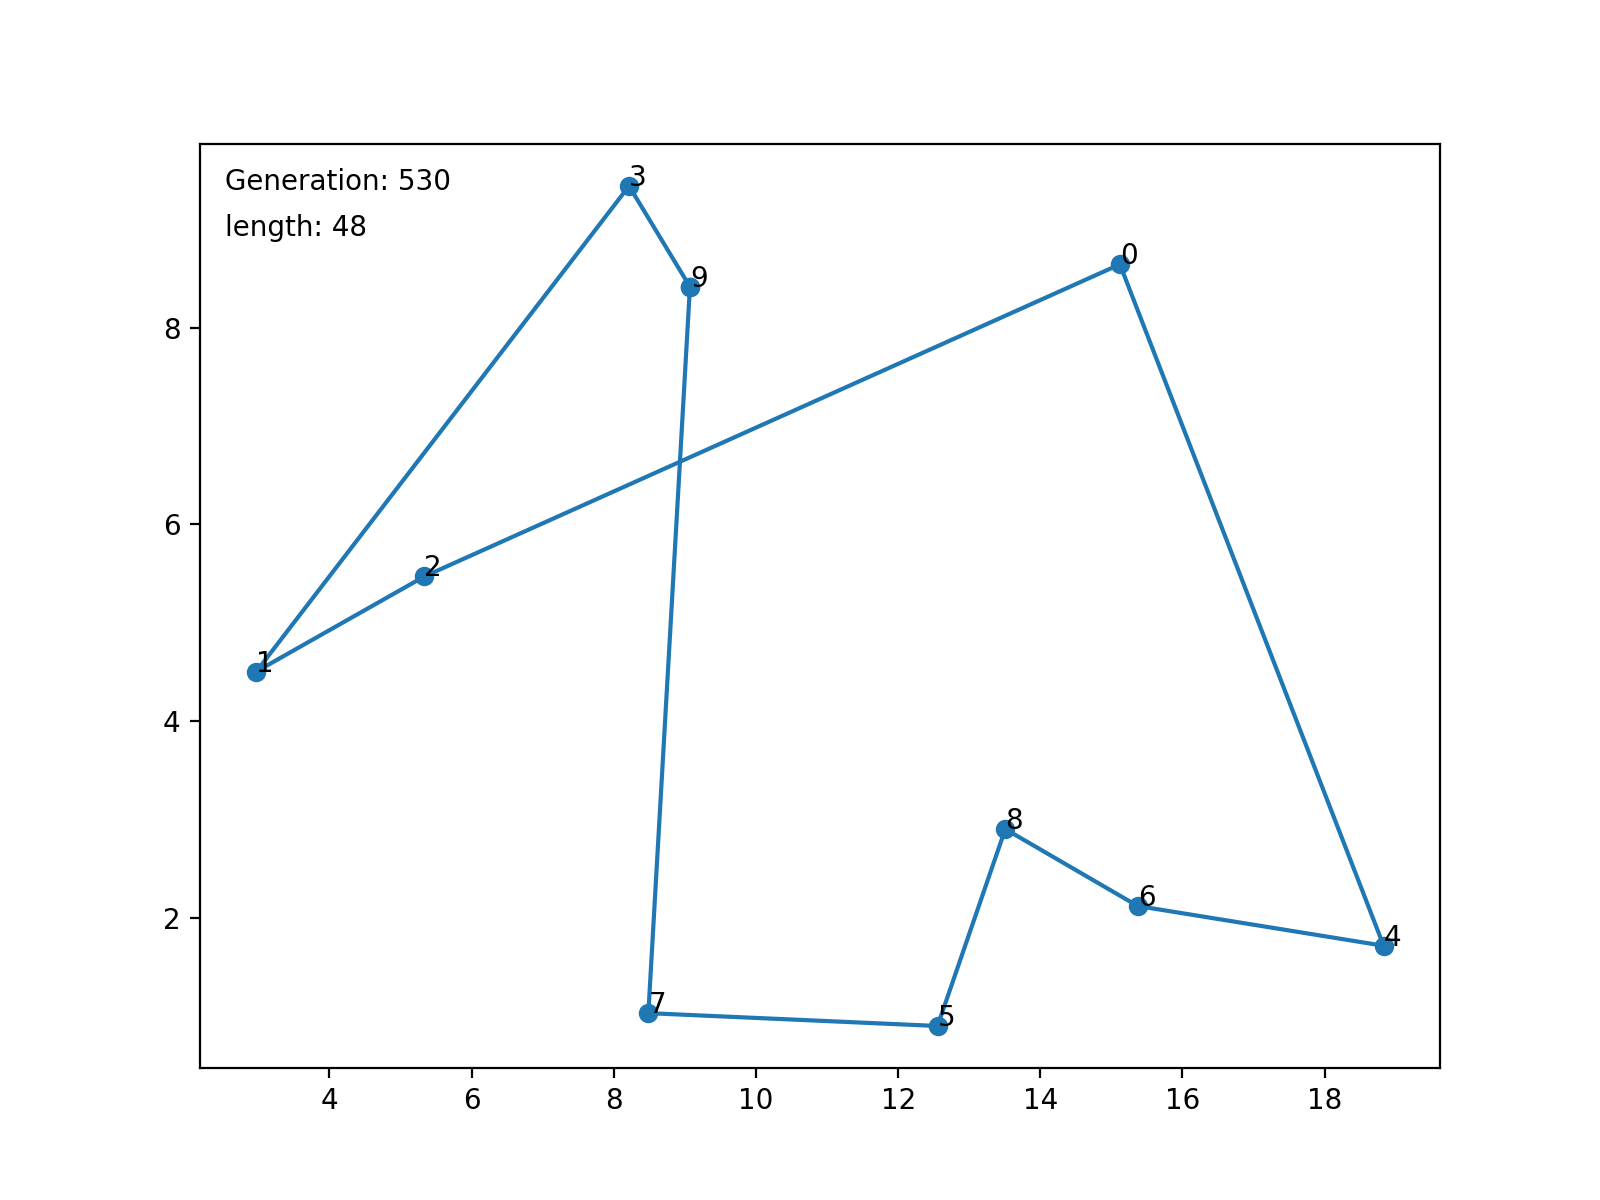

In [12]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))

ax.scatter(A[:, 0], A[:, 1], s = 20)
    
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    ax.clear()
    for j in range(len(A)):
        ax.text(A[j, 0], A[j, 1], str(j))
        
    ax.text(0.02, 0.95, 'Generation: %d' %i, transform=ax.transAxes)
    
    population = all_generation[i]
    fitness_list = [fitness(x) for x in population]
    rank = np.argsort(fitness_list)
    best = population[rank[0]]
    
    ax.text(0.02, 0.90, 'length: %d' % fitness(best), transform=ax.transAxes)
    #ax.text(0.02, 0.85, 'Route:' + str(best), transform=ax.transAxes)
    
    pos = A[best]
    x = list(pos[:, 0]) + [pos[0, 0]]
    y = list(pos[:, 1]) + [pos[0, 1]]
    ax.plot(x, y, ls = '-', marker='o')
    
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0, N_iteration, 10), interval=200, blit=True)

plt.show()

In [6]:
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.clear()
# ax.scatter(A[:, 0], A[:, 1], s = 20)
# for i in range(len(A)):
#     ax.text(A[i, 0] + 0.02, A[i, 1], str(i))
# plt.show()